# **MEMASUKKAN LIBRARY** 

In [1]:
#Mengimport Library

import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# MEMASUKKAN DATASET

In [2]:
#Membaca Dataset

df=pd.read_csv('dataset_diabetes.csv')

In [3]:
#Menampilkan Data

df.head()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
0,8,188,78,0,0,47.9,0.137,43,1
1,7,152,88,44,0,50.0,0.337,36,1
2,2,99,52,15,94,24.6,0.637,21,0
3,1,109,56,21,135,25.2,0.833,23,0
4,2,88,74,19,53,29.0,0.229,22,0


# **INFORMASI DARI DATASET**

In [4]:
#menampilkan Informasi dari data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kehamilan   768 non-null    int64  
 1   Glukosa     768 non-null    int64  
 2   Darah       768 non-null    int64  
 3   LemakTubuh  768 non-null    int64  
 4   Insulin     768 non-null    int64  
 5   BMI         768 non-null    float64
 6   Riwayat     768 non-null    float64
 7   Umur        768 non-null    int64  
 8   Hasil       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


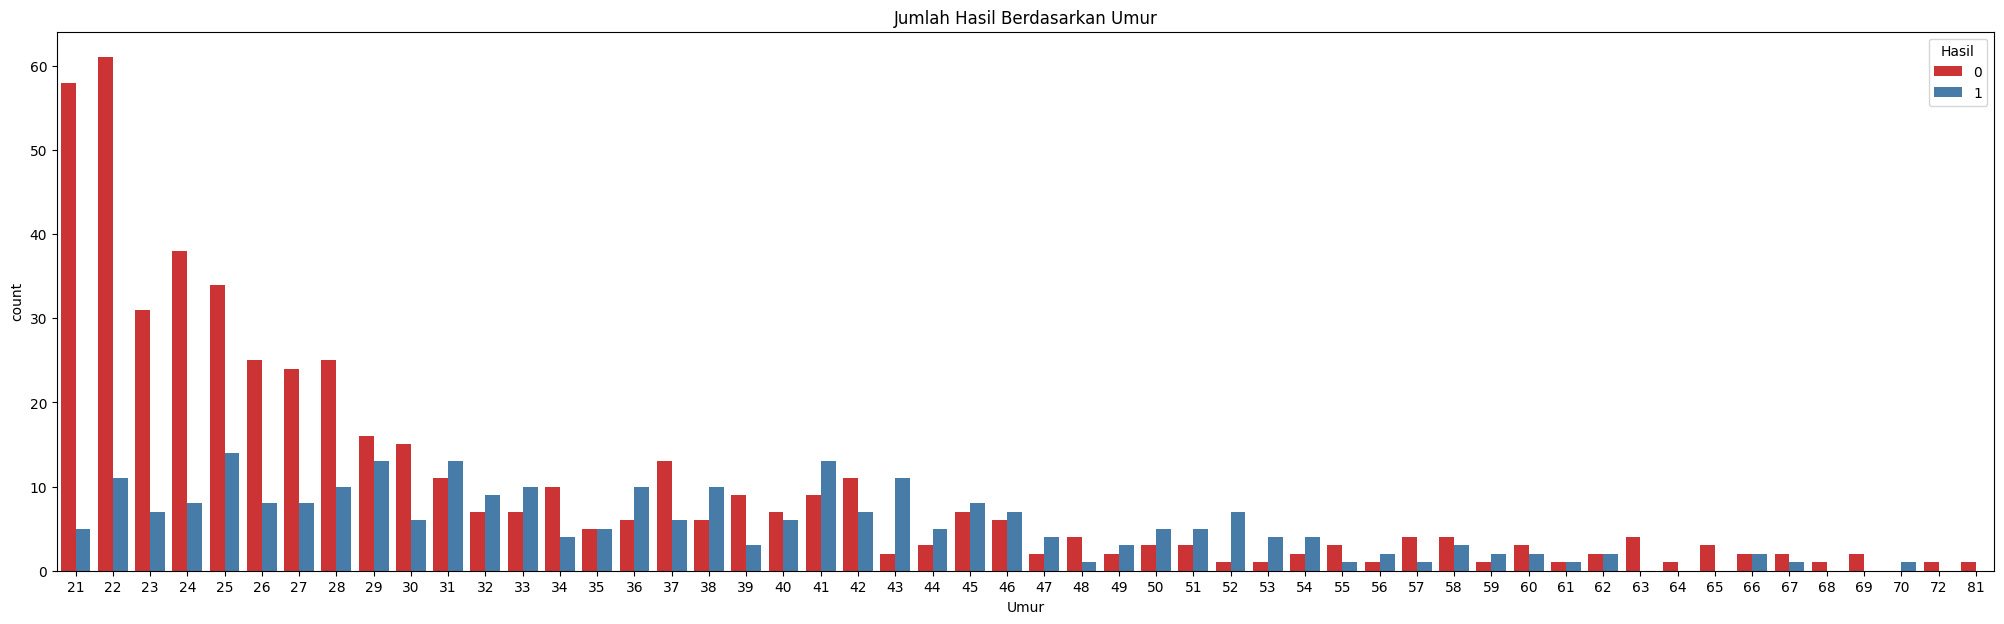

In [5]:
#Menampilkan Grafik

plt.figure(figsize=(25,7))
hasil2 = sns.countplot(x='Umur', hue='Hasil', data=df, palette='Set1')
plt.title('Jumlah Hasil Berdasarkan Umur')
plt.show(hasil2)

In [6]:
#Jumlah Nilai hasil positif dan negatif pada data


df.Hasil.value_counts()

0    500
1    268
Name: Hasil, dtype: int64

<AxesSubplot: xlabel='Hasil', ylabel='count'>

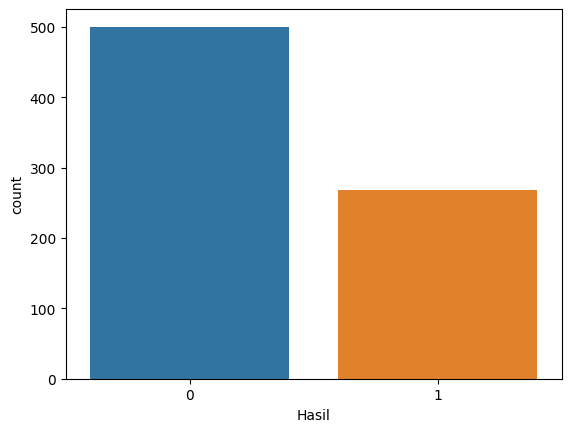

In [7]:
# visualisasi nilai hasil data 

sns.countplot(data=df, x='Hasil')

In [8]:
#isi kolom pada data

df.columns

Index(['Kehamilan', 'Glukosa', 'Darah', 'LemakTubuh', 'Insulin', 'BMI',
       'Riwayat', 'Umur', 'Hasil'],
      dtype='object')

# **MELIHAT NILAI YANG HILANG**

In [9]:
#mengecek apakah ada data yg kosong atau hilang data

df.isnull().any().sum()

0

# **MENGGANTI NILAI YANG 0 MENJADI NILAI RATA-RATA**

In [10]:
#menampilkan tabel max dan min pada data

df.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#mengubah nilai yang kosong menjadi nilai rata rata data 

col=('Glukosa', 'Darah', 'LemakTubuh','Insulin','BMI')

for i in col:
    df[i].replace(0,df[i].mean(),inplace=True)

In [12]:
df.describe()

,Kehamilan,Glukosa,Darah,LemakTubuh,Insulin,BMI,Riwayat,Umur,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **PEMBAGIAN DATASET MENJADI DATA X DAN Y**

In [ ]:
#Pembagian data X dan Y pada data

X = df.drop('Hasil', axis=1)
y = df['Hasil']

In [ ]:
#Menampilkan X

X.head()

In [ ]:
#Menampilkan y

y.head()

# **NORMALISASI DATA**

In [ ]:
#Normalisasi Data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

# **SCALING DATA**

In [ ]:
#Bagi data mnjadi data uji dan data latih

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.1, random_state = 0)
print("Jumlah Data Latih        :", x_train.shape)
print("Jumlah Data Uji          :", x_test .shape)
print("Jumlah Hasil Data Latih  :", y_train.shape)
print("Jumlah Hasil Data Uji    :", y_test.shape)

# **MODELLING KNN**

In [ ]:
#PEMBUATAN MODEL KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=14)             #input nilai k

knn.fit(x_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(x_test))

# Prediksi Hasil

In [ ]:
train_pred = knn.predict(x_train)
test_pred  = knn.predict(x_test)

In [ ]:
pred = knn.predict(x_test)
pred

In [ ]:
cols = {
    'Data Asli'    : y_test,
    'Data Prediksi': test_pred,
}

print("Prediksi Yang Dihasilkan")
pd.DataFrame(cols)

# Evaluasi Hasil Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi = 400)
mat = confusion_matrix(y_test, test_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for KNN')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
print(classification_report(y_test,test_pred))

In [ ]:
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, test_pred)*100))
print("Precision Score: {:.2f}".format(precision_score(y_test, test_pred, average='macro')*100))
print("Recall Score: {:.2f}".format(recall_score(y_test, test_pred, average='macro')*100))

**Evaluasi Data Uji**

In [ ]:
#Evaluasi Model

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)
print(f1_score(y_test, test_pred) * 100, '%')

In [ ]:
#Hasil Akurasi

print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, test_pred) * 100, '%'))
plt.show()

**Evaluasi Data Latih**

In [ ]:
#Evaluasi Model

conf_matrix = confusion_matrix(y_train, train_pred)
print(conf_matrix)
print(f1_score(y_train, train_pred) * 100, '%')

In [ ]:
#Hasil Akurasi

print(accuracy_score(y_train, train_pred) * 100, '%')
plt.show()

# Mengambil Data Uji untuk Evaluasi Akhir

In [ ]:
#Evaluasi Model

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)
print(f1_score(y_test, test_pred) * 100, '%')

In [ ]:
#Hasil Akurasi

print(accuracy_score(y_test, test_pred) * 100, '%')
plt.show()

In [ ]:
#Menampilkan Akurasi 

score = []
for n in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    knnscore = knn.score(x_test, y_test)
    sken = score.append(knnscore)
    print(n, knnscore)

In [ ]:
#Menampilkan Grafik  Akruasi tiap Nilai K

plt.figure(figsize=(12,6))
plt.plot(range(1,20), score, color='green', linestyle='-', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Ks Akurasi')
plt.xlabel('K Value')
plt.ylabel('Akurasi')
plt.show()

# Simpan model digunakan untuk Sistem

In [ ]:
#Simpan model pakai PICKLE

import pickle 

with open('knn_pickle', 'wb') as r:
    pickle.dump(knn,r)

In [ ]:
with open('knn_pickle', 'rb') as r:
    knn = pickle.load(r)

In [ ]:
y_pred = knn.predict(x_test)

round(accuracy_score(y_test, test_pred),n)*100